## Final Project Submission

Please fill out:
* Student name: Abdihakim Issack
* Student pace: Hybrid Full Time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali


### Load the data ###
Here we start by loading the necessary Libraries required 

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Load the dataset ###
We load the Dataset and display the first rows of the data and analyze the structure. Use low_memory=False since we are working with a very big data set

In [2]:
df = pd.read_csv('data/Aviation_data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


 ### Check The Data Types and Summary Statistics ###
We can check for the data types in the dataset to get an overview of the data distributution


In [3]:
# here we check data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

**Null Values**

Several columns contain missing values for example **Latitude** and **Longitude** with 34000 non null entries
Columns like **Aircraft.Category** and **FAR.Description** have over 50,000 missing values.
**Total.Fatal.Injuries**, **Total.Serious.Injuries**, **Total.Minor.Injuries**, and **Total.Uninjured** have some missing entries too.

**Data Types**
Most of the columns are of object type, while a few are float64 (likely numerical data like injury counts).

The injuries i.e fatal, serious and minor occur less likely with a mojority of incidents resulting in no injuries
There exists some outliers with a high number of injuries or fatalities.
The number of engines typically ranges from 1 to 8, but the presence of 0 engines in some entries could suggest data quality issues that requeres cleaning

In [4]:
# Here we get to display all the column headers
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Understand the unique values in the categorical data like Injury.Severity and weather.Conditions and know the range of values

In [5]:
# Get the Unique values in the weather.Condtion 
df['Weather.Condition'].unique()


array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [6]:
# Get the Injury Severity Unique values.
df['Injury.Severity'].unique()


array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [28]:
df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,1948-10-24,"moose creek, id",united states,Fatal(2),Destroyed,NaN,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,1962-07-19,"bridgeport, ca",united states,Fatal(4),Destroyed,NaN,N5069P,Piper,...,Reciprocating,Personal,4.0,0.000000,0.000000,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"saltville, va",united states,Fatal(3),Destroyed,NaN,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.279881,0.357061,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"eureka, ca",united states,Fatal(2),Destroyed,NaN,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"canton, oh",united states,Fatal(1),Destroyed,NaN,N15NY,Cessna,...,NaN,Personal,1.0,2.000000,0.357061,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,2022-12-26,"annapolis, md",united states,Minor,NaN,NaN,N1867H,PIPER,...,NaN,Personal,0.0,1.000000,0.000000,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,2022-12-26,"hampton, nh",united states,NaN,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,2022-12-26,"payson, az",united states,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.000000,0.000000,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,2022-12-26,"morgan, ut",united states,NaN,NaN,NaN,N210CU,CESSNA,...,NaN,Personal,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning ###
#### Check For Missing Values ####
We need to check for missing values and identify columns or rows with with missing values. This is essential to know where the data is incomplete and may require handling during the cleaning phase.

In [7]:
# check for the total missing values in each columns
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [8]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() / len(df)) * 100



Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.382831
Airport.Name              41.570372
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.072564
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.447913
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

### Check for Duplicates ### 
Duplicate records can skew analysis and data understanding results. Identifying and removing duplicate entries is important.

In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows


1390

In [10]:
# Drop Dulicated rows 
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().mean()*100

Event.Id                   0.077565
Investigation.Type         0.000000
Accident.Number            0.077565
Event.Date                 0.077565
Location                   0.136019
Country                    0.331617
Latitude                  61.350300
Longitude                 61.360417
Airport.Code              43.513793
Airport.Name              40.657389
Injury.Severity            1.201691
Aircraft.damage            3.668023
Aircraft.Category         63.705344
Registration.Number        1.558039
Make                       0.148385
Model                      0.180984
Amateur.Built              0.192226
Number.of.Engines          6.916747
Engine.Type                8.033004
FAR.Description           64.002113
Schedule                  85.856247
Purpose.of.flight          7.038153
Air.carrier               81.285550
Total.Fatal.Injuries      12.893725
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Uninjured            6.723398
Weather.Condition          5

### Dropping Irrelevant columns ###
The Columns to drop depend on how usefull they are and how their absence could affect the data analysis.

**Accident.Number:** Identifier columns that are not useful for analysis.

**Airport.Code:** Might not contribute meaningful information. 

**Airport.Name:** Might not contribute meaningful information.

**FAR.Description:** Too many missing values.

**Schedule:** Too many missing values and could be irrelevant.

**Air.carrier:** Not be useful for the analysis.

**Longitude/Latitude:** Too much missing values and not that much relevant

**Schedule:** May not be relevant to the analysis of accidents.

### Correct Data Types ###
Make sure that the columns have the correct datatypes like data time.
Also clean columns by stripping whitespace and converting to lowercase.

In [12]:
# Convert 'Event.Date' to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

df['Location'] = df['Location'].str.strip().str.lower()
df['Country'] = df['Country'].str.strip().str.lower()


In [13]:
df.drop(columns=['Accident.Number','Schedule', 'Airport.Code', 'Airport.Name', 'Longitude','Latitude', 'FAR.Description', 'Schedule', 'Air.carrier'], inplace=True)


In [14]:
# confirm that the columns have been dropped
df.shape

(88958, 23)

### Filling Null Values with Mean, Median or Mode ###
For **Categorical data** we will impute the values with the mode i.e the most recurring set of data. 

If there are no significant **outliers** in the data, the **mean** will provide a reliable estimate.

If there are outliers, the **median** provides a better central value because it is not influenced by extreme values.

For Columns such as **Total.Fatal.Injuries**, **Total.Minor.Injuries**, **Total.Serious.Injuries**, **Total.Uninjured**, **Number.of.engines** we are going to impute witht the mean

In [15]:
# Fill the Total.Fatal.Injuries missing values with the mean
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean())

# Fill the Total.Serious.Injuries missing values with the mean
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mean())

# Fill the Total.Minor.Injuries missing values with the mean
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean())

# Fill the minor Injuries missing values with the mean
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean())

# Fill the Number of engines Missing values with the mean
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean())


### Group the Data and see the relationship between different Columns ###
#### Countries with the Highest Fatal Injuries ####
Did the grouping of the data by Country the total fatal injuries. This will allow us to identify countries with the most fatalities.
This will help to understand geographical risks in aviation and which countries which are more prone to aviation accidents with fatal outcomes.


In [16]:
# Group by Country and sum the Total.Fatal.Injuries
country_fatalities = df.groupby('Country')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
country_fatalities.head(10)

Country
united states     37092.248787
brazil             1254.013538
india               975.182841
canada              971.266351
indonesia           959.365682
france              836.970641
russia              766.295710
colombia            713.069972
mexico              670.492089
united kingdom      500.040613
Name: Total.Fatal.Injuries, dtype: float64

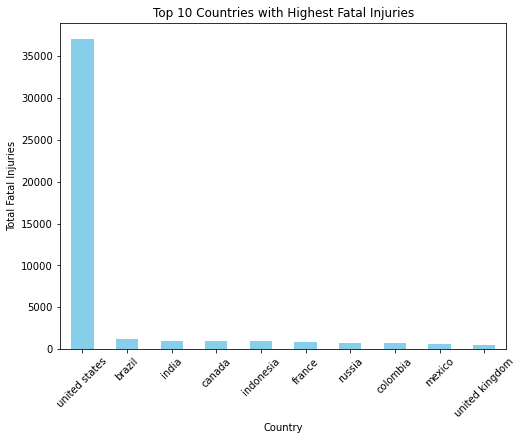

In [17]:
# Plot Countries with highest fatalities
plt.figure(figsize=(8,6))
country_fatalities.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Fatal Injuries')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

The United States has a significantly higher fatal injuries (37,092), which may indicate a higher volume of flights, accidents, or risks in the country. Brazil, India, Canada, and Indonesia also have notable figures, suggesting that accident risks in these regions should be carefully evaluated before venturing into the market. It might be wise to focus on regions with lower fatality rates.

#### Aircraft Makes with the Highest Average Number of Engines ####
Grouping by Make and averaging the number of engines is going determine which aircraft makes generally have more engines. This information could be relevant when analyzing aircraft types that experience higher or lower accident rates.

This helps us analyze the correlation between having engine and being involved in a specific type of accident. 

In [18]:
# Group by Make and average Number.of.Engines
make_avg_engines = df.groupby('Make')['Number.of.Engines'].mean().sort_values(ascending=False)


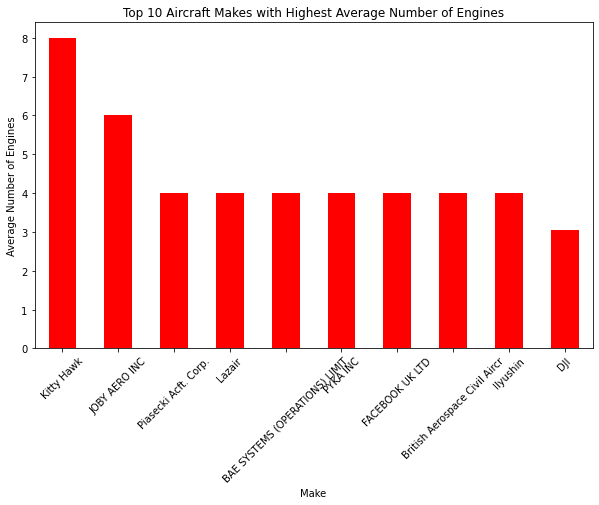

In [19]:
# Plot: Aircraft makes with the highest average number of engines
plt.figure(figsize=(10,6))
make_avg_engines.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Aircraft Makes with Highest Average Number of Engines')
plt.ylabel('Average Number of Engines')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.show()

Manufacturers like Kitty Hawk and JOBY AERO INC have a relatively high number of engines per aircraft, which could be complex or have higher maintenance costs. Focusing on simpler aircraft with fewer engines but still meeting operational needs could help reduce both risks and costs.

### Fatal Injuries by Weather Condition ###
Grouping Weather.Condition to examine how different weather conditions correlate with aviation fatalities.
This will let us know if certain weather conditions pose a higher risk for avaiation accidents.

**Visual Meteorological Conditions (VMC)** Refers to weather conditions where the visibility is good enough for the pilot or crew to fly the aircraft using visual reference i.e., the pilot can see outside and doesn't need to rely on instruments. VMC suggests clear skies or good weather where the pilot can navigate visually. Despite good weather, accidents can still occur due to other factors such as human error or mechanical failure.

**Instrument Meteorological Conditions (IMC)** Refers to weather conditions that are poor enough that the pilot must rely on the aircraft's instruments for navigation i.e visibility is reduced


In [20]:
# Group by Weather.Condition and sum Total.Fatal.Injuries
weather_fatalities = df.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
weather_fatalities.head(10)

Weather.Condition
VMC    32427.208174
IMC    12075.367799
UNK     2471.137660
Unk      326.000000
Name: Total.Fatal.Injuries, dtype: float64

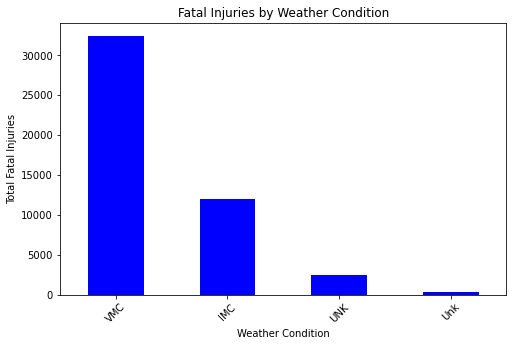

In [21]:
# Plot: Fatal injuries based on weather conditions
plt.figure(figsize=(8,5))
weather_fatalities.plot(kind='bar', color='blue')
plt.title('Fatal Injuries by Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.show()

The majority of fatal injuries occur under **Visual Meteorological Conditions (VMC)**, with a total of 32,427, while **Instrument Meteorological Conditions (IMC)** have a smaller fatalities (12,075). The company should consider investing in safety measures, training, or technology that mitigates pilot errors or misjudgments under VMC.

### Aircraft.damage and sum Total.Fatal.Injuries ###
Grouping Aircraft damage and the sum of total fatalities helps to identify the fatalities outcomes with different aircraft damage and how may affect decisions on what kind of aitcrafts to purchase.

In [22]:
# Group by Aircraft.damage and sum Total.Fatal.Injuries
damage_fatalities = df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

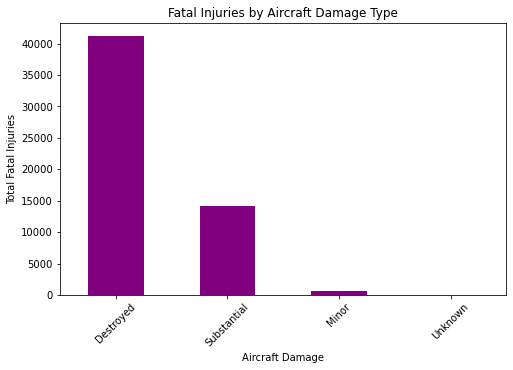

In [23]:
# Plot Fatal injuries by aircraft damage type
plt.figure(figsize=(8,5))
damage_fatalities.plot(kind='bar', color='purple')
plt.title('Fatal Injuries by Aircraft Damage Type')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Aircraft Damage')
plt.xticks(rotation=45)
plt.show()

**Destroyed Aircrafts** account for the majority of fatalities. This shows that incidents where the aircraft is destroyed have the greatest risk. 
The company should consider aircraft models based on factorrs such as durability and survival rates after accident to minimize life loss or fatality risks. 


### Fatal Injuries by Purpose of Flight ###
Grouping Purpose.of.flight to investigate which flight types (e.g., commercial, private, or military) have higher fatality rates.
This can provide insights into the risk levels of different types of flight operations.


In [24]:
# Group by Purpose.of.flight and sum Total.Fatal.Injuries
purpose_fatalities = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)


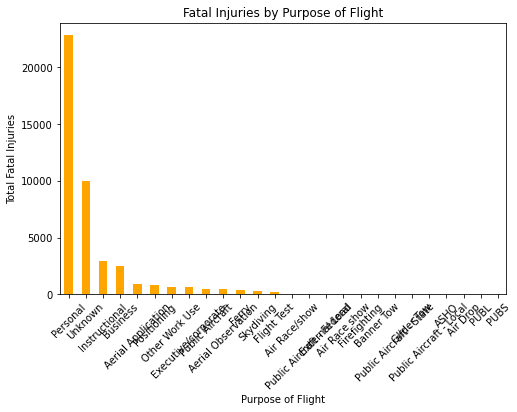

In [25]:
# Plot Fatal injuries by purpose of flight
plt.figure(figsize=(8,5))
purpose_fatalities.plot(kind='bar', color='orange')
plt.title('Fatal Injuries by Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Purpose of Flight')
plt.xticks(rotation=45)
plt.show()

**Personal flights** account for the highest number of fatal injuries, followed by Unknown and Instructional purposes. 
**Business flights** , which account for fewer injuries, may present a safer and more controlled entry point for the company.

### Exploratory Data Analysis (EDA) ###
This is a crucial step in understanding the data before diving into modeling. In this phase, we aim to summarize the main characteristics of the dataset, often using visual methods. 
For categorical variables, we look at the count of unique values. This helps us understand the distribution of different categories. For example, we can check how many different types of investigations are present in our dataset.

In [26]:
# To get some meaningful statistics of our data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88958.000000,88958.000000,88958.000000,88958.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.430791,5.120083,1.430754,2.079349,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We know that Weather conditions for example are crucial when investigating plane crashes and air safaty, We can check the distribution of the Weather column 

In [27]:
# Distribution of weather condition
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

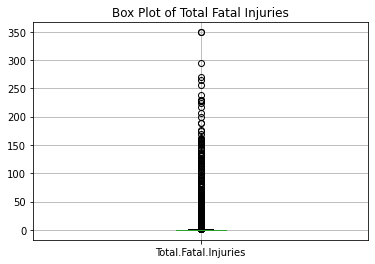

In [28]:
df.boxplot(column=['Total.Fatal.Injuries'])
plt.title('Box Plot of Total Fatal Injuries')
plt.show()


### Correlation Analysis ###
Correlation measures the strength and direction of the relationship between two numerical variables. For EDA

In [30]:
# Correlation matrix for numerical columns
correlation_matrix = df.corr()
correlation_matrix


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.058877,0.032357,0.054979,0.361420
Total.Fatal.Injuries,0.058877,1.000000,0.111190,0.040299,-0.012921
Total.Serious.Injuries,0.032357,0.111190,1.000000,0.220255,0.048086
Total.Minor.Injuries,0.054979,0.040299,0.220255,1.000000,0.133363
Total.Uninjured,0.361420,-0.012921,0.048086,0.133363,1.000000


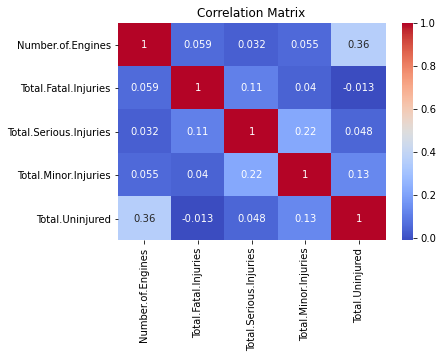

In [31]:
# Generate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Number of Engines and Total Uninjured #####
There is a moderate positive correlation (0.406) between the number of engines and the total number of uninjured people.meaning that generally, the higher the number of engines,the higher the number of uninjured passengers 

#### Total Fatal Injuries ####
The correlation with Total Serious Injuries (0.136) is weak but positive.
This indicates that as serious injuries increase, there may also be a slight increase in fatal injuries, although the relationship is not strong.
Interestingly, the correlation with Total Uninjured is negative (-0.015), suggesting that in scenarios where there are more fatalities, there are not necessarily more survivors, which might point to the severity of accidents.

#### Total Minor Injuries  ####
It shows a stronger correlation (0.327) with Total Serious Injuries, indicating that with serious injuries, minor injuries are also likely to occur.


### Line Plot of Fatal Injuries Over Time ###
This is usefull in analyzing trends in fatal injuries over the years.

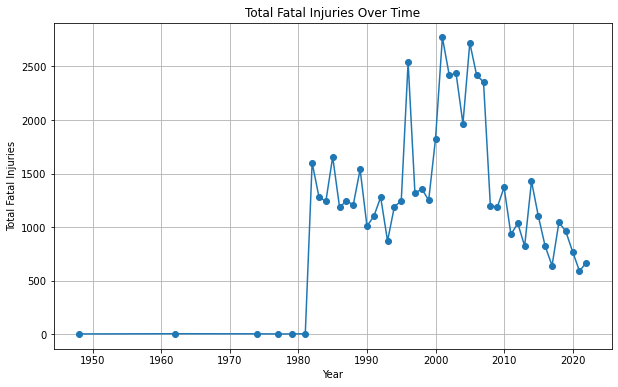

In [32]:
# Group by year and sum of total fatal injuries
fatal_injuries_over_time = df.groupby(df['Event.Date'].dt.year)['Total.Fatal.Injuries'].sum()

# Line Plot
plt.figure(figsize=(10, 6))
fatal_injuries_over_time.plot(kind='line', marker='o')
plt.title('Total Fatal Injuries Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.grid(True)
plt.show()


Scatter Plot of Fatal Injuries by Latitude and Longitude
Purpose: Map the geographic distribution of fatal injuries using scatter plot.

In [36]:
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Longitude'], df['Latitude'], s=df['Total.Fatal.Injuries'] * 5, alpha=0.6, color='red')
# plt.title('Geographical Distribution of Fatal Injuries')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


**Box Plot of Injuries by Aircraft Category** 
This will help visualize the spread of total fatal injuries across different aircraft categories.

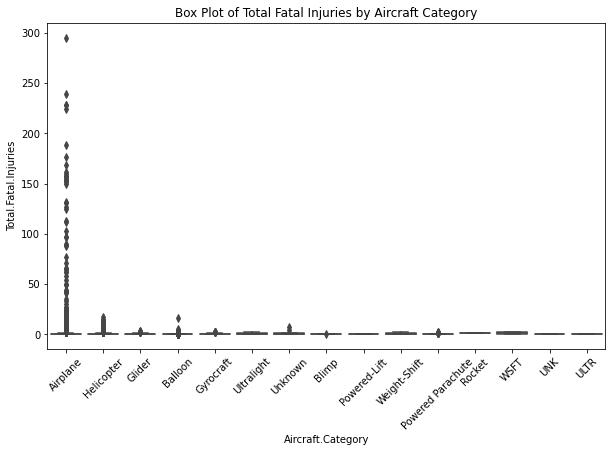

In [34]:
# Create a box plot for Total Fatal Injuries by Aircraft Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Aircraft.Category', y='Total.Fatal.Injuries')
plt.title('Box Plot of Total Fatal Injuries by Aircraft Category')
plt.xticks(rotation=45)
plt.show()
